In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd


In [2]:
iris_in = np.genfromtxt('iris_in.csv', delimiter=',', names=None)
iris_out = np.genfromtxt('iris_out.csv', delimiter=',', names=None)
rmse_history = []

In [3]:
# 切分訓練集和測試集(25:75)
X = iris_in[:150]
y = iris_out[:150]
X_train = X[:75]
y_train = y[:75]
X_test = X[75:]
y_test = y[75:]

In [4]:
# 包含輸入維度, 隱藏層維度, 輸入維度, 輸出維度, 學習率, 訓練次數
np.random.seed(0)
input_dim = X_train.shape[1]
hidden_dim = 5
output_dim = 1
lr = 0.01
epochs = 1000

# 初始話權重(-1~1)和誤差
weights_input_hidden = np.random.rand(input_dim, hidden_dim) * 2 - 1
bias_hidden = np.zeros((1, hidden_dim))
weights_hidden_output = np.random.rand(hidden_dim, output_dim) * 2 - 1
bias_output = np.zeros((1, output_dim))

In [5]:
# 定義 sigmoid 函數
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)
    
    # Compute RMSE
    rmse = np.sqrt(np.mean((predicted_output - y_train.reshape(-1, 1))**2))
    rmse_history.append(rmse)
    
    # Backpropagation
    error = y_train.reshape(-1, 1) - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * lr
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
    
    weights_input_hidden += X_train.T.dot(d_hidden_layer) * lr
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

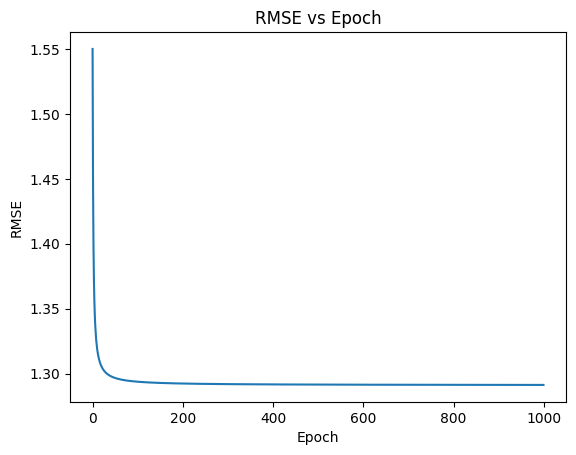

In [7]:
plt.plot(range(epochs), rmse_history)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs Epoch')
plt.show()

In [8]:
# 測試集
hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

predicted_classes = (predicted_output > 0.5).astype(int).flatten()

# 計算正確率
accuracy = np.mean(predicted_classes == y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 33.33%
